## Can we recognise an user just by its keystroke data?
### First dataset, we study the data from 10 different users

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import csv 
import requests
sns.set_style("white")

#dataRaw = pd.read_csv('logFinal.csv',sep=',')
url1 = 'https://drive.google.com/file/d/1Vv-YfTzW2kH4bJntOJYOTtXPG55avyQd/view?usp=sharing'
firstDataset = requests.get(url1)
dataRaw = firstDataset.iter_lines()

data = csv.reader(dataRaw, delimiter=',')
#data = dataRaw.set_index('Name')

#data.head()
data

### We split the data into 3 tables, the hold, Press-Press and Release-Press tables

In [7]:
hold = data[['H.t','H.h','H.e','H.Space','H.f','H.i','H.v','H.e','H.Space','H.b','H.o','H.x','H.i','H.n','H.g','H.Space','H.w','H.i','H.z','H.a','H.r','H.d','H.s','H.Space','H.j','H.u','H.m','H.p','H.Space','H.q','H.u','H.i','H.c','H.k','H.l','H.y','H.ENTER']].copy()
UD = data[['UD.t.h','UD.h.e','UD.e.Space','UD.Space.f','UD.f.i','UD.i.v','UD.v.e','UD.e.Space','UD.Space.b','UD.b.o','UD.o.x','UD.x.i','UD.i.n','UD.n.g','UD.g.Space','UD.Space.w','UD.w.i','UD.i.z','UD.z.a','UD.a.r','UD.r.d','UD.d.s','UD.s.Space','UD.Space.j','UD.j.u','UD.u.m','UD.m.p','UD.p.Space','UD.Space.q','UD.q.u','UD.u.i','UD.i.c','UD.c.k','UD.k.l','UD.l.y','UD.y.ENTER']].copy()
DD = data[['DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']].copy()

DD

DD.t.h   DD.h.e  DD.e.Space  DD.Space.f   DD.f.i   DD.i.v   DD.v.e  \
Name                                                                          
Pelayo  0.12890  0.11190     0.13560     0.20030  0.06230  0.16950  0.11930   
Pelayo  0.14370  0.13270     0.09400     0.21730  0.08660  0.15390  0.18670   
Pelayo  0.07170  0.15010     0.09810     0.22730  0.07440  0.14880  0.16540   
Pelayo  0.27060  0.20550     0.19960     1.18190  0.11570  0.48710  0.10370   
Pelayo  0.11610  0.11850     0.08210     0.18020  0.05630  0.13400  0.11020   
...         ...      ...         ...         ...      ...      ...      ...   
Alex    0.20308  0.14059     0.07805     0.15626  0.12498  0.28118  0.10933   
Alex    0.20309  0.10932     0.10934     0.15624  0.14060  0.23915  1.07451   
Alex    0.25757  0.14059     0.14058     0.17184  0.18746  0.29680  0.12496   
Alex    0.21904  0.17336     0.13140     0.17223  0.11620  0.31242  0.12498   
Alex    0.23394  0.12534     0.09372     0.17184  0.12497  0.28118  0.10936   

        DD.e.Space  DD.Space.b   DD.b.o  ...   DD.m.p  DD.p.Space  DD.Space.q  \
Name                                     ...                                    
Pelayo     0.13560     0.44660  0.10090  ...  0.26800     0.37190     0.42090   
Pelayo     0.09400     0.32860  0.08530  ...  0.30700     0.24020     0.48460   
Pelayo     0.09810     0.40550  0.12620  ...  0.26990     0.24890     0.39210   
Pelayo     0.19960     0.69790  0.11580  ...  0.16080     0.24030     0.82760   
Pelayo     0.08210     1.45630  0.25010  ...  0.13000     0.23890     0.48860   
...            ...         ...      ...  ...      ...         ...         ...   
Alex       0.07805     2.17012  0.59358  ...  0.24991     0.23438     0.24992   
Alex       0.10934     0.37521  0.15620  ...  0.20306     0.18746     0.56238   
Alex       0.14058     0.18744  0.26527  ...  0.21869     0.24993     0.26553   
Alex       0.13140     0.89044  0.32804  ...  0.24992     0.21869     0.24995   
Alex       0.09372     0.99975  0.32806  ...  0.24959     0.23468     0.28116   

         DD.q.u   DD.u.i   DD.i.c   DD.c.k   DD.k.l   DD.l.y  DD.y.ENTER  
Name                                                                      
Pelayo  0.33700  0.11120  0.68670  0.32090  0.29630  0.33000     0.62580  
Pelayo  0.16870  0.11410  0.28300  0.21270  0.52160  0.19040     0.31530  
Pelayo  0.06080  0.11830  0.89510  0.14720  0.17600  0.23790     0.24220  
Pelayo  0.22730  0.10360  0.30260  0.18000  0.19360  0.20800     0.37870  
Pelayo  0.16160  0.10000  0.46950  0.14760  0.29670  0.27630     0.92260  
...         ...      ...      ...      ...      ...      ...         ...  
Alex    0.12499  0.18744  0.24955  0.48466  0.18746  0.24994     0.59362  
Alex    0.17186  0.18738  0.21876  0.21870  1.56174  0.17221     0.26558  
Alex    0.14059  0.17186  0.21869  0.24992  0.18746  0.29685     0.21870  
Alex    0.17153  0.18776  0.24993  0.18746  0.18748  0.39054     0.39052  
Alex    0.15624  0.21868  0.29681  0.17182  0.18746  0.15620     0.67248  

[110 rows x 36 columns]


### How does our 'raw' data looks like?

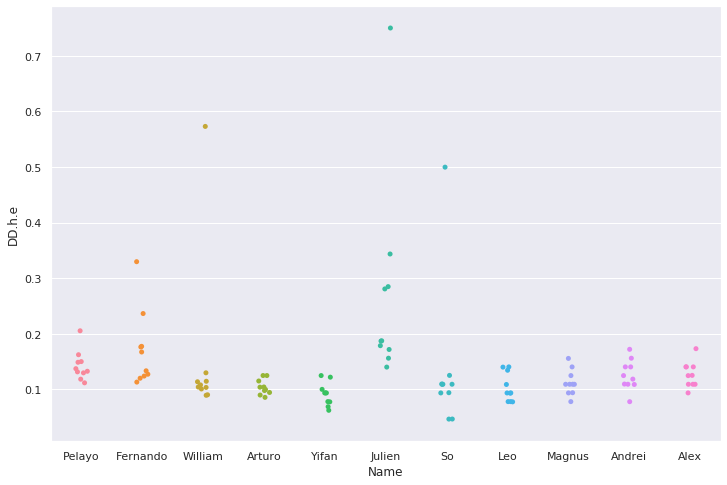

In [141]:
sns.set(rc={'figure.figsize':(12,8)})

pointPlot1 = sns.stripplot(x = DD.index, y = "DD.h.e", data = DD, jitter = True);

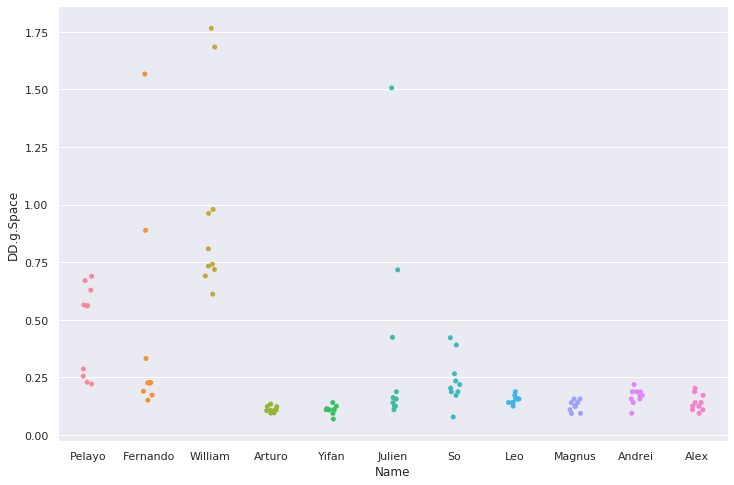

In [142]:
sns.stripplot(x = DD.index, y = "DD.g.Space", data = DD, jitter = True);

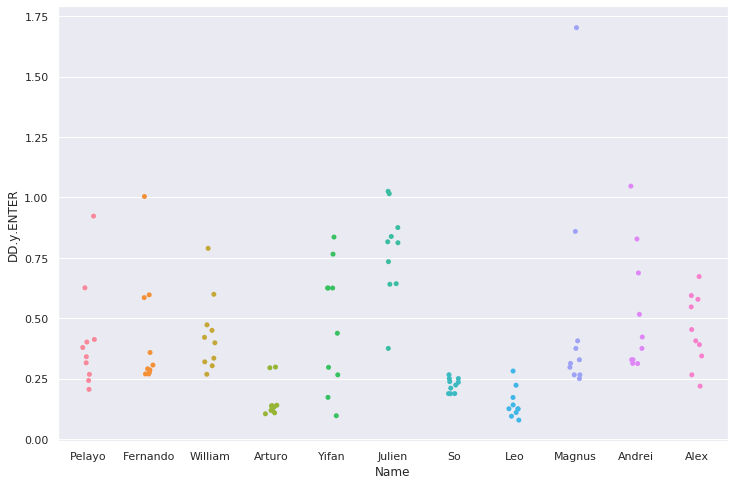

In [143]:
pointPlot3 = sns.stripplot(x = DD.index, y = "DD.y.ENTER", data = DD, jitter = True);





### We assume if the time is bigger than 2 seconds, the user was distracted, because the environment wasn't very formal, so some values are not 'real' from their reaction time

In [8]:
NaDD = DD[DD>2]

seeNaDD = NaDD[NaDD.notna().any(axis=1)]

pd.set_option('display.max_columns', None)
seeNaDD

DD.t.h  DD.h.e  DD.e.Space  DD.Space.f  DD.f.i  DD.i.v  DD.v.e  \
Name                                                                       
Fernando     NaN     NaN         NaN         NaN     NaN     NaN     NaN   
Fernando     NaN     NaN         NaN         NaN     NaN     NaN     NaN   
William      NaN     NaN         NaN         NaN     NaN     NaN     NaN   
Yifan        NaN     NaN         NaN     2.62465     NaN     NaN     NaN   
Julien       NaN     NaN         NaN         NaN     NaN     NaN     NaN   
Alex         NaN     NaN         NaN         NaN     NaN     NaN     NaN   

          DD.e.Space  DD.Space.b  DD.b.o  DD.o.x   DD.x.i  DD.i.n  DD.n.g  \
Name                                                                        
Fernando         NaN         NaN     NaN     NaN      NaN     NaN     NaN   
Fernando         NaN     4.97590     NaN     NaN      NaN     NaN     NaN   
William          NaN     2.80350     NaN     NaN      NaN     NaN     NaN   
Yifan            NaN         NaN     NaN     NaN      NaN     NaN     NaN   
Julien           NaN         NaN     NaN     NaN  3.14129     NaN     NaN   
Alex             NaN     2.17012     NaN     NaN      NaN     NaN     NaN   

          DD.g.Space  DD.Space.w  DD.w.i  DD.i.z  DD.z.a  DD.a.r  DD.r.d  \
Name                                                                       
Fernando         NaN     3.59960     NaN     NaN     NaN     NaN     NaN   
Fernando         NaN         NaN     NaN     NaN     NaN     NaN     NaN   
William          NaN         NaN     NaN     NaN     NaN     NaN     NaN   
Yifan            NaN         NaN     NaN     NaN     NaN     NaN     NaN   
Julien           NaN     2.15534     NaN     NaN     NaN     NaN     NaN   
Alex             NaN         NaN     NaN     NaN     NaN     NaN     NaN   

          DD.d.s  DD.s.Space  DD.Space.j  DD.j.u  DD.u.m  DD.m.p  DD.p.Space  \
Name                                                                           
Fernando     NaN         NaN         NaN     NaN     NaN     NaN         NaN   
Fernando     NaN         NaN         NaN     NaN     NaN     NaN         NaN   
William      NaN         NaN         NaN     NaN     NaN     NaN         NaN   
Yifan        NaN         NaN         NaN     NaN     NaN     NaN         NaN   
Julien       NaN         NaN         NaN     NaN     NaN     NaN         NaN   
Alex         NaN         NaN         NaN     NaN     NaN     NaN         NaN   

          DD.Space.q  DD.q.u  DD.u.i  DD.i.c  DD.c.k  DD.k.l  DD.l.y  \
Name                                                                   
Fernando         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Fernando         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
William          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Yifan            NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Julien           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Alex             NaN     NaN     NaN     NaN     NaN     NaN     NaN   

          DD.y.ENTER  
Name                  
Fernando         NaN  
Fernando         NaN  
William          NaN  
Yifan            NaN  
Julien           NaN  
Alex             NaN

### To be able to understand better the plots, we shrink those values to 2

In [9]:

for row in DD.itertuples(index=False):
    for i in row:
        if i>2:
            DD = DD.replace(i, 2.0)
                        
for row in UD.itertuples(index=False):
    for i in row:
        if i>2:
            UD = UD.replace(i, 2.0)
            
NaDD = DD[DD>1.9]

seeNaDD = NaDD[NaDD.notna().any(axis=1)]

pd.set_option('display.max_columns', None)
seeNaDD

DD.t.h  DD.h.e  DD.e.Space  DD.Space.f  DD.f.i  DD.i.v  DD.v.e  \
Name                                                                       
Fernando     NaN     NaN         NaN         NaN     NaN     NaN     NaN   
Fernando     NaN     NaN         NaN         NaN     NaN     NaN     NaN   
Fernando     NaN     NaN         NaN         NaN     NaN     NaN     NaN   
William      NaN     NaN         NaN         NaN     NaN     NaN     NaN   
Yifan        NaN     NaN         NaN         2.0     NaN     NaN     NaN   
Julien       NaN     NaN         NaN         NaN     NaN     NaN     NaN   
Alex         NaN     NaN         NaN         NaN     NaN     NaN     NaN   

          DD.e.Space  DD.Space.b  DD.b.o  DD.o.x  DD.x.i  DD.i.n  DD.n.g  \
Name                                                                       
Fernando         NaN      1.9975     NaN     NaN     NaN     NaN     NaN   
Fernando         NaN         NaN     NaN     NaN     NaN     NaN     NaN   
Fernando         NaN      2.0000     NaN     NaN     NaN     NaN     NaN   
William          NaN      2.0000     NaN     NaN     NaN     NaN     NaN   
Yifan            NaN         NaN     NaN     NaN     NaN     NaN     NaN   
Julien           NaN         NaN     NaN     NaN     2.0     NaN     NaN   
Alex             NaN      2.0000     NaN     NaN     NaN     NaN     NaN   

          DD.g.Space  DD.Space.w  DD.w.i  DD.i.z  DD.z.a  DD.a.r  DD.r.d  \
Name                                                                       
Fernando         NaN         2.0     NaN     NaN     NaN     NaN     NaN   
Fernando         NaN         NaN     NaN     NaN     NaN     NaN     NaN   
Fernando         NaN         NaN     NaN     NaN     NaN     NaN     NaN   
William          NaN         NaN     NaN     NaN     NaN     NaN     NaN   
Yifan            NaN         NaN     NaN     NaN     NaN     NaN     NaN   
Julien           NaN         2.0     NaN     NaN     NaN     NaN     NaN   
Alex             NaN         NaN     NaN     NaN     NaN     NaN     NaN   

          DD.d.s  DD.s.Space  DD.Space.j  DD.j.u  DD.u.m  DD.m.p  DD.p.Space  \
Name                                                                           
Fernando     NaN         NaN         NaN     NaN     NaN     NaN         NaN   
Fernando     NaN         NaN         NaN     NaN     NaN     NaN      1.9816   
Fernando     NaN         NaN         NaN     NaN     NaN     NaN         NaN   
William      NaN         NaN         NaN     NaN     NaN     NaN         NaN   
Yifan        NaN         NaN         NaN     NaN     NaN     NaN         NaN   
Julien       NaN         NaN         NaN     NaN     NaN     NaN         NaN   
Alex         NaN         NaN         NaN     NaN     NaN     NaN         NaN   

          DD.Space.q  DD.q.u  DD.u.i  DD.i.c  DD.c.k  DD.k.l  DD.l.y  \
Name                                                                   
Fernando         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Fernando         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Fernando         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
William          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Yifan            NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Julien           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Alex             NaN     NaN     NaN     NaN     NaN     NaN     NaN   

          DD.y.ENTER  
Name                  
Fernando         NaN  
Fernando         NaN  
Fernando         NaN  
William          NaN  
Yifan            NaN  
Julien           NaN  
Alex             NaN



### We split the data into the users, then we make the Mean and Std. Deviation of the values

In [10]:
PelayoHold = hold.head(10)
PelayoHoldMean = PelayoHold.mean(axis=0)
PelayoHoldStd = PelayoHold.std(axis=0)

FernandoHold = hold.iloc[10:20]
FernandoHoldMean = FernandoHold.mean(axis=0)
FernandoHoldStd = FernandoHold.std(axis=0)

WilliamHold = hold.iloc[20:30]
WilliamHoldMean = WilliamHold.mean(axis=0)
WilliamHoldStd = WilliamHold.std(axis=0)

ArturoHold = hold.iloc[30:40]
ArturoHoldMean = ArturoHold.mean(axis=0)
ArturoHoldStd = ArturoHold.std(axis=0)

YifanHold = hold.iloc[40:50]
YifanHoldMean = YifanHold.mean(axis=0)
YifanHoldStd = YifanHold.std(axis=0)

JulienHold = hold.iloc[50:60]
JulienHoldMean = JulienHold.mean(axis=0)
JulienHoldStd = JulienHold.std(axis=0)

SoHold = hold.iloc[60:70]
SoHoldMean = SoHold.mean(axis=0)
SoHoldStd = SoHold.std(axis=0)

LeoHold = hold.iloc[70:80]
LeoHoldMean = LeoHold.mean(axis=0)
LeoHoldStd = LeoHold.std(axis=0)

MagnusHold = hold.iloc[80:90]
MagnusHoldMean = MagnusHold.mean(axis=0)
MagnusHoldStd = MagnusHold.std(axis=0)

AndreiHold = hold.iloc[90:100]
AndreiHoldMean = AndreiHold.mean(axis=0)
AndreiHoldStd = AndreiHold.std(axis=0)

AlexHold = hold.iloc[100:110]
AlexHoldMean = AlexHold.mean(axis=0)
AlexHoldStd = AlexHold.std(axis=0)

dataHoldMean = pd.concat([PelayoHoldMean, FernandoHoldMean, WilliamHoldMean, ArturoHoldMean, YifanHoldMean, JulienHoldMean, SoHoldMean, LeoHoldMean, MagnusHoldMean, AndreiHoldMean, AlexHoldMean], axis=1)
dataHoldStd = pd.concat([PelayoHoldStd, FernandoHoldStd, WilliamHoldStd, ArturoHoldStd, YifanHoldStd, JulienHoldStd, SoHoldStd, LeoHoldStd, MagnusHoldStd, AndreiHoldStd, AlexHoldStd], axis=1)

MeanHold = dataHoldMean.set_axis(['Pelayo', 'Fernando','William','Arturo','Yifan','Julien','So','Leo','Magnus','Andrei','Alex'], axis='columns')
StdHold = dataHoldStd.set_axis(['Pelayo', 'Fernando','William','Arturo','Yifan','Julien','So','Leo','Magnus','Andrei','Alex'], axis='columns')

In [11]:
PelayoUD = UD.head(10)
PelayoUDMean = PelayoUD.mean(axis=0)
PelayoUDStd = PelayoUD.std(axis=0)

FernandoUD = UD.iloc[10:20]
FernandoUDMean = FernandoUD.mean(axis=0)
FernandoUDStd = FernandoUD.std(axis=0)

WilliamUD = UD.iloc[20:30]
WilliamUDMean = WilliamUD.mean(axis=0)
WilliamUDStd = WilliamUD.std(axis=0)

ArturoUD = UD.iloc[30:40]
ArturoUDMean = ArturoUD.mean(axis=0)
ArturoUDStd = ArturoUD.std(axis=0)

YifanUD = UD.iloc[40:50]
YifanUDMean = YifanUD.mean(axis=0)
YifanUDStd = YifanUD.std(axis=0)

JulienUD = UD.iloc[50:60]
JulienUDMean = JulienUD.mean(axis=0)
JulienUDStd = JulienUD.std(axis=0)

SoUD = UD.iloc[60:70]
SoUDMean = SoUD.mean(axis=0)
SoUDStd = SoUD.std(axis=0)

LeoUD = UD.iloc[70:80]
LeoUDMean = LeoUD.mean(axis=0)
LeoUDStd = LeoUD.std(axis=0)

MagnusUD = UD.iloc[80:90]
MagnusUDMean = MagnusUD.mean(axis=0)
MagnusUDStd = MagnusUD.std(axis=0)

AndreiUD = UD.iloc[90:100]
AndreiUDMean = AndreiUD.mean(axis=0)
AndreiUDStd = AndreiUD.std(axis=0)

AlexUD = UD.iloc[100:110]
AlexUDMean = AlexUD.mean(axis=0)
AlexUDStd = AlexUD.std(axis=0)

dataUDMean = pd.concat([PelayoUDMean, FernandoUDMean, WilliamUDMean, ArturoUDMean, YifanUDMean, JulienUDMean, SoUDMean, LeoUDMean, MagnusUDMean, AndreiUDMean, AlexUDMean], axis=1)
dataUDStd = pd.concat([PelayoUDStd, FernandoUDStd, WilliamUDStd, ArturoUDStd, YifanUDStd, JulienUDStd, SoUDStd, LeoUDStd, MagnusUDStd, AndreiUDStd, AlexUDStd], axis=1)

MeanUD = dataUDMean.set_axis(['Pelayo', 'Fernando','William','Arturo','Yifan','Julien','So','Leo','Magnus','Andrei','Alex'], axis='columns')
StdUD = dataUDStd.set_axis(['Pelayo', 'Fernando','William','Arturo','Yifan','Julien','So','Leo','Magnus','Andrei','Alex'], axis='columns')

In [12]:
PelayoDD = DD.head(10)
PelayoDDMean = PelayoDD.mean(axis=0)
PelayoDDStd = PelayoDD.std(axis=0)

FernandoDD = DD.iloc[10:20]
FernandoDDMean = FernandoDD.mean(axis=0)
FernandoDDStd = FernandoDD.std(axis=0)

WilliamDD = DD.iloc[20:30]
WilliamDDMean = WilliamDD.mean(axis=0)
WilliamDDStd = WilliamDD.std(axis=0)

ArturoDD = DD.iloc[30:40]
ArturoDDMean = ArturoDD.mean(axis=0)
ArturoDDStd = ArturoDD.std(axis=0)

YifanDD = DD.iloc[40:50]
YifanDDMean = YifanDD.mean(axis=0)
YifanDDStd = YifanDD.std(axis=0)

JulienDD = DD.iloc[50:60]
JulienDDMean = JulienDD.mean(axis=0)
JulienDDStd = JulienDD.std(axis=0)

SoDD = DD.iloc[60:70]
SoDDMean = SoDD.mean(axis=0)
SoDDStd = SoDD.std(axis=0)

LeoDD = DD.iloc[70:80]
LeoDDMean = LeoDD.mean(axis=0)
LeoDDStd = LeoDD.std(axis=0)

MagnusDD = DD.iloc[80:90]
MagnusDDMean = MagnusDD.mean(axis=0)
MagnusDDStd = MagnusDD.std(axis=0)

AndreiDD = DD.iloc[90:100]
AndreiDDMean = AndreiDD.mean(axis=0)
AndreiDDStd = AndreiDD.std(axis=0)

AlexDD = DD.iloc[100:110]
AlexDDMean = AlexDD.mean(axis=0)
AlexDDStd = AlexDD.std(axis=0)

dataDDMean = pd.concat([PelayoDDMean, FernandoDDMean, WilliamDDMean, ArturoDDMean, YifanDDMean, JulienDDMean, SoDDMean, LeoDDMean, MagnusDDMean, AndreiDDMean, AlexDDMean], axis=1)
dataDDStd = pd.concat([PelayoDDStd, FernandoDDStd, WilliamDDStd, ArturoDDStd, YifanDDStd, JulienDDStd, SoDDStd, LeoDDStd, MagnusDDStd, AndreiDDStd, AlexDDStd], axis=1)

MeanDD = dataDDMean.set_axis(['Pelayo', 'Fernando','William','Arturo','Yifan','Julien','So','Leo','Magnus','Andrei','Alex'], axis='columns')
StdDD = dataDDStd.set_axis(['Pelayo', 'Fernando','William','Arturo','Yifan','Julien','So','Leo','Magnus','Andrei','Alex'], axis='columns')


### Mean values of the 3 tables for each letter/combination of letters

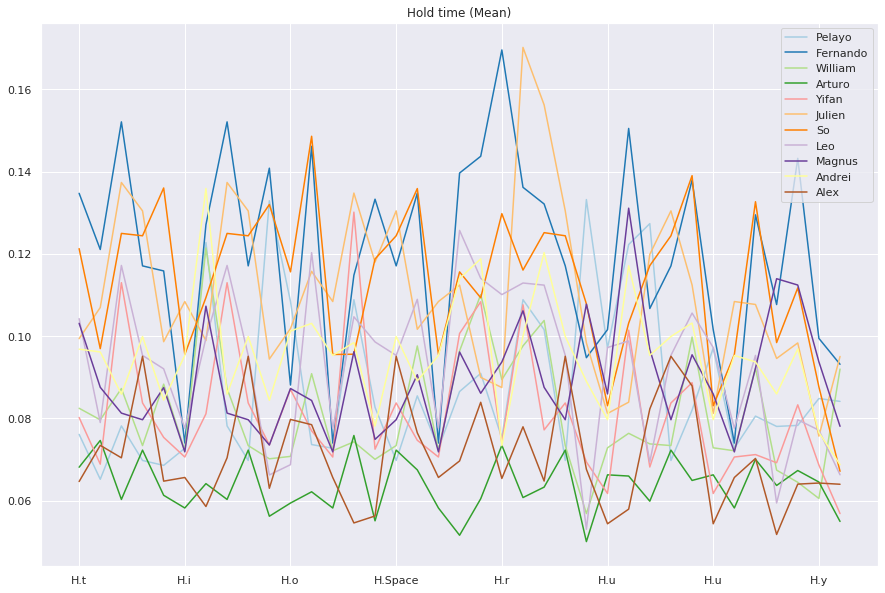

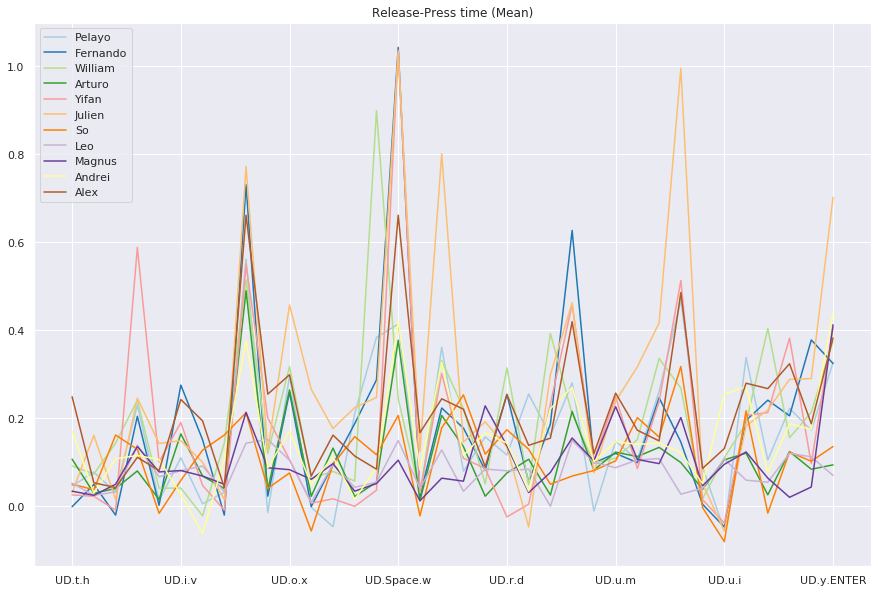

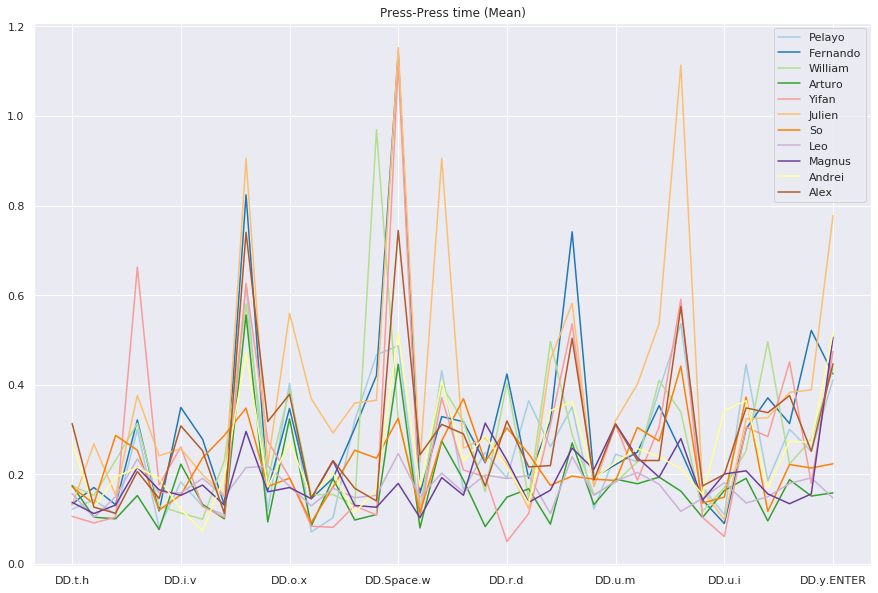

In [149]:
MeanHold.plot(figsize=(15,10), colormap='Paired', title= 'Hold time (Mean)')
MeanUD.plot(figsize=(15,10), colormap='Paired', title= 'Release-Press time (Mean)')
MeanDD.plot(figsize=(15,10), colormap='Paired', title= 'Press-Press time (Mean)') 

### The same for the DD DF because is the most interesting

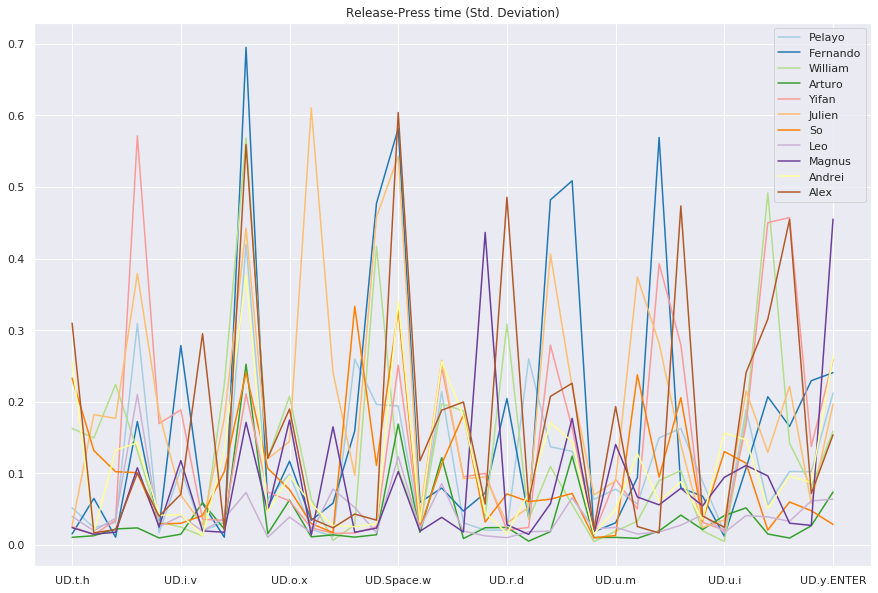

In [150]:
StdUD.plot(figsize=(15,10), colormap='Paired', title= 'Release-Press time (Std. Deviation)') 

##### The start of the words have the highest differences, people think before writing the next one, its not as automatic as letters in the middle of a word

###   

### Mean/Std (of the mean values) for all the values for each user

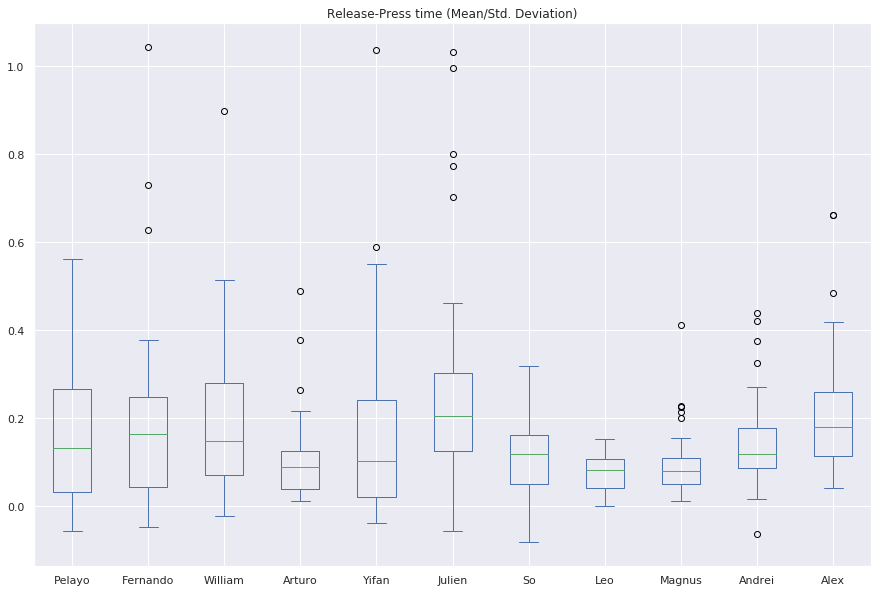

In [152]:
MeanUD.plot.box(figsize=(15,10), title= 'Release-Press time (Mean/Std. Deviation)')

##### The consistent writer have less unusual values (shorter boxes, closer points)

###     

### Correlation between values

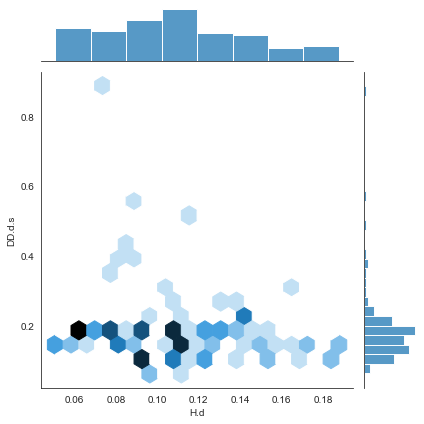

In [13]:
sns.jointplot(x ="H.d", y ="DD.d.s", data = data, kind="hex")

#### Higher hold times don´t mean higher DD times

###      

### Which letters are faster to travel from one to another? Which ones are slower?

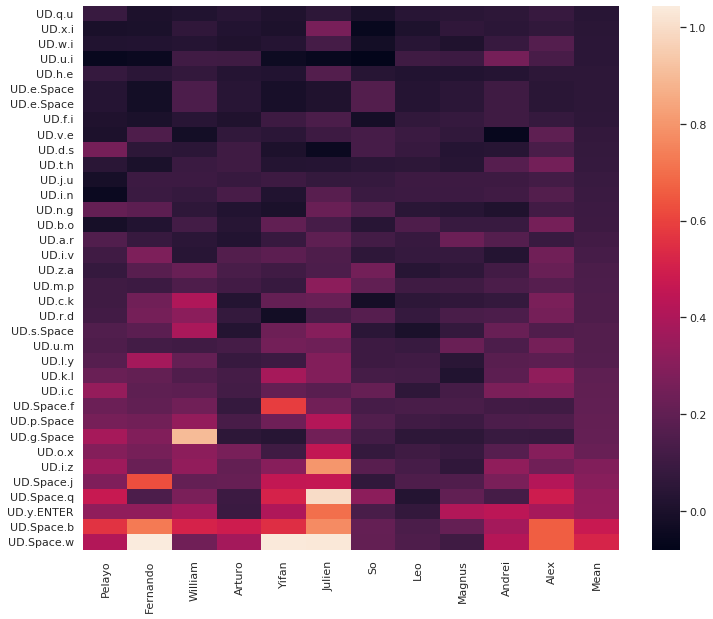

In [155]:
sns.set(rc={'figure.figsize':(12,10)})
meanColumns = MeanUD.T.mean()
MeanUD['Mean'] = meanColumns
heatMap = MeanUD.sort_values('Mean',ascending=True)
sns.heatmap(heatMap)
plt.show()

#### Generally, the slowest time are starting or finishing a word, and the faster time is when the first letter is clearly on the left and the second on the right (right handed writers, they have better reaction time with the right hand)

### Now we will propose some models and see if they are capable of distinguishing the users

##    

## Models training

### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

def test_RandomForest():
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    print(f'Random Forest : {random_forest.score(X_test, y_test)*100:.4}% accuracy')

### KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier

def test_knn():
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    knn.fit(X_train, y_train)

    print(f'KNN : {knn.score(X_test, y_test)*100:.4}% accuracy with euclidean distance')


    knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
    knn.fit(X_train, y_train)

    print(f'KNN : {knn.score(X_test, y_test)*100:.4}% accuracy with manhattan distance')


### SVM

In [119]:
from sklearn.svm import SVC
def test_SVC():
    svc = SVC()
    svc.fit(X_train,y_train)
    print(f'SVC : {svc.score(X_test, y_test)*100:.4}% accuracy')

### Manhattan Scaled

In [120]:
import numpy as np

class ManhattanScaledClassifier:
    def __init__(self):
        self.classes = []
        self.full_vectors = {} # contains all datapoints for class
        self.mean_vectors = {}
        #mad = mean absolute deviation
        self.mad_vectors = {}
    def fit(self, x, y):
        for xi, yi in zip(x, y):
            if yi not in self.classes:
                self.classes.append(yi)
                self.full_vectors[yi] = [xi]
            else:
                self.full_vectors[yi].append(xi)
        for yi in self.full_vectors:
            ar = np.array(self.full_vectors[yi])
            self.mean_vectors[yi] = ar.mean(axis=0)
            epsilon = 0.1 #put everything above zero
            self.mad_vectors[yi] = np.mean(np.absolute(ar - np.mean(ar, axis=0)), axis=0) + epsilon
    def predict(self, x):
        scores = {}
        for yi in self.classes:
            ar = np.array(x)
            score = (abs(x - self.mean_vectors[yi]) / self.mad_vectors[yi]).sum()
            scores[score] = yi
        return scores[min(list(scores.keys()))]
    def score(self, x, y):
        good_pred = 0
        bad_pred = 0
        for xi, yi in zip(x, y):
            pred = self.predict(xi)
            if pred == yi:
                good_pred += 1
            else:
                bad_pred += 1
        return good_pred / (good_pred + bad_pred)


In [121]:
def test_manhattan_scaled():
    manhattan_scaled = ManhattanScaledClassifier()
    manhattan_scaled.fit(X_train, y_train)
    print(f'Manhattan Scaled : {manhattan_scaled.score(X_test, y_test)*100:.4}% accuracy')

## Models testing

In [122]:
from sklearn.model_selection import train_test_split

def split(dataframe):
    x = []
    y = []

    for index, row in dataframe.iterrows():
        y.append(index)
        new_x = []
        for i in list(row.keys())[2:]:
            new_x.append(row[i])
        x.append(new_x)

    return train_test_split(x, y, test_size=0.2, random_state=42)

### 12 subjects with 10 data point each (split 80/20)

In [123]:
X_train, X_test, y_train, y_test = split(data)
test_RandomForest()
test_knn()
test_SVC()
test_manhattan_scaled()

Random Forest : 95.45% accuracy
KNN : 68.18% accuracy with euclidean distance
KNN : 90.91% accuracy with manhattan distance
SVC : 50.0% accuracy
Manhattan Scaled : 72.73% accuracy


### 4 subjects with 20 data point each (split 80/20)

In [124]:
data2 = pd.read_csv('logPCLeo.csv')
data2 = data2.set_index('subject')
X_train, X_test, y_train, y_test = split(data2)
test_RandomForest()
test_knn()
test_SVC()
test_manhattan_scaled()

Random Forest : 100.0% accuracy
KNN : 100.0% accuracy with euclidean distance
KNN : 100.0% accuracy with manhattan distance
SVC : 100.0% accuracy
Manhattan Scaled : 100.0% accuracy


### 4 subjects with 10 data point each (split 80/20)

In [125]:
data2 = data2[data2.rep <= 10]
X_train, X_test, y_train, y_test = split(data2)
test_RandomForest()
test_knn()
test_SVC()
test_manhattan_scaled()

Random Forest : 100.0% accuracy
KNN : 87.5% accuracy with euclidean distance
KNN : 100.0% accuracy with manhattan distance
SVC : 100.0% accuracy
Manhattan Scaled : 100.0% accuracy


#### The number of subjects has a greater impact on performance than number of data point per subject.

## Live Testing

### Sadly, input capture cannot be done in a notebook. Instead, we can show it in a terminal

#### Saving models

In [50]:
import pickle as pkl

with open('randomForest.pkl', 'wb') as f:
    pkl.dump(classifier, f)
with open('knn.pkl', 'wb') as f:
    pkl.dump(knn, f)
with open('svm.pkl', 'wb') as f:
    pkl.dump(svc, f)
with open('manhattan_scaled.pkl', 'wb') as f:
    pkl.dump(manhattan_scaled, f)

PicklingError: Can't pickle <class '__main__.ManhattanScaledClassifier'>: it's not the same object as __main__.ManhattanScaledClassifier

### From the training we get...

##    

## Is there difference between using your own PC and using anotyher person's PC? How much do they improve with time?

### Second dataset: study users writing in different keyboards

In [159]:
dataRawPC = pd.read_csv('logPC.csv',sep=',')
#https://drive.google.com/file/d/1jxdqN7cx0i19trSezvTxLNEyoNFllEEQ/view?usp=sharing

dataPC = dataRawPC.set_index('Name')

dataPC

Session  Try      H.t   DD.t.h   UD.t.h      H.h   DD.h.e   UD.h.e  \
Name                                                                          
Arturo         1    1  0.07785  0.17892  0.10107  0.07297  0.12789  0.05491   
Arturo         1    2  0.07667  0.18067  0.10401  0.08093  0.09830  0.01738   
Arturo         1    3  0.07009  0.17426  0.10417  0.07635  0.09958  0.02323   
Arturo         1    4  0.05894  0.10522  0.04627  0.08008  0.13711  0.05703   
Arturo         1    5  0.04670  0.10064  0.05394  0.07490  0.14857  0.07366   
...          ...  ...      ...      ...      ...      ...      ...      ...   
Florent        1   16  0.07615  0.09058  0.01442  0.12436  0.13277  0.00841   
Florent        1   17  0.06101  0.06990  0.00889  0.10743  0.09129 -0.01614   
Florent        1   18  0.08381  0.09295  0.00914  0.11023  0.09772 -0.01250   
Florent        1   19  0.08861  0.12402  0.03542  0.11146  0.06676 -0.04470   
Florent        1   20  0.09336  0.12240  0.02905  0.11898  0.08705 -0.03193   

             H.e  DD.e.Space  UD.e.Space  H.Space  DD.Space.f  UD.Space.f  \
Name                                                                        
Arturo   0.06212     0.11298     0.05086  0.05097     0.13454     0.08356   
Arturo   0.05270     0.10644     0.05374  0.07386     0.11648     0.04262   
Arturo   0.06764     0.12748     0.05984  0.06949     0.10858     0.03909   
Arturo   0.06308     0.09899     0.03590  0.06556     0.15854     0.09298   
Arturo   0.05218     0.08355     0.03137  0.05622     0.19194     0.13572   
...          ...         ...         ...      ...         ...         ...   
Florent  0.09471     0.08385    -0.01086  0.13128     0.17335     0.04207   
Florent  0.10555     0.06545    -0.04010  0.15345     0.14062    -0.01283   
Florent  0.10539     0.08744    -0.01795  0.11809     0.15325     0.03516   
Florent  0.11555     0.10238    -0.01317  0.12346     0.14154     0.01808   
Florent  0.10526     0.07290    -0.03236  0.15859     0.17165     0.01305   

             H.f   DD.f.i   UD.f.i      H.i   DD.i.v   UD.i.v      H.v  \
Name                                                                     
Arturo   0.06740  0.08600  0.01860  0.05854  0.23868  0.18015  0.06944   
Arturo   0.06768  0.08868  0.02100  0.04966  0.23382  0.18416  0.06106   
Arturo   0.05740  0.08062  0.02322  0.05351  0.24219  0.18867  0.06896   
Arturo   0.06642  0.07391  0.00748  0.04472  0.23214  0.18742  0.07041   
Arturo   0.06437  0.08636  0.02198  0.04815  0.26569  0.21754  0.06211   
...          ...      ...      ...      ...      ...      ...      ...   
Florent  0.07866  0.12643  0.04777  0.11825  0.09629 -0.02195  0.13421   
Florent  0.07512  0.09991  0.02479  0.11309  0.12347  0.01038  0.13437   
Florent  0.07988  0.11852  0.03864  0.11212  0.12134  0.00922  0.12141   
Florent  0.08326  0.10245  0.01919  0.09776  0.13273  0.03497  0.11174   
Florent  0.09506  0.15251  0.05745  0.10657  0.12356  0.01698  0.11652   

          DD.v.e   UD.v.e    H.e.1  DD.e.Space.1  UD.e.Space.1  H.Space.1  \
Name                                                                        
Arturo   0.13746  0.06801  0.06881       0.07375       0.00495    0.05873   
Arturo   0.10310  0.04204  0.06133       0.09149       0.03016    0.07297   
Arturo   0.12951  0.06056  0.05283       0.06680       0.01397    0.08018   
Arturo   0.09556  0.02516  0.06391       0.09641       0.03251    0.07738   
Arturo   0.13230  0.07020  0.05591       0.09364       0.03773    0.03771   
...          ...      ...      ...           ...           ...        ...   
Florent  0.08129 -0.05292  0.07409       0.09907       0.02498    0.12326   
Florent  0.07258 -0.06179  0.09185       0.10680       0.01495    0.12728   
Florent  0.07111 -0.05030  0.07053       0.09868       0.02814    0.11859   
Florent  0.06932 -0.04242  0.07259       0.10100       0.02841    0.13763   
Florent  0.07905 -0.03747  0.08958       0.15360       0.06402    0.11772   

         DD.Sp

In [160]:
holdPC = dataPC[['Session','H.t','H.h','H.e','H.Space','H.f','H.i','H.v','H.e','H.Space','H.b','H.o','H.x','H.i','H.n','H.g','H.Space','H.w','H.i','H.z','H.a','H.r','H.d','H.s','H.Space','H.j','H.u','H.m','H.p','H.Space','H.q','H.u','H.i','H.c','H.k','H.l','H.y','H.ENTER']].copy()
UDPC = dataPC[['Session','UD.t.h','UD.h.e','UD.e.Space','UD.Space.f','UD.f.i','UD.i.v','UD.v.e','UD.e.Space','UD.Space.b','UD.b.o','UD.o.x','UD.x.i','UD.i.n','UD.n.g','UD.g.Space','UD.Space.w','UD.w.i','UD.i.z','UD.z.a','UD.a.r','UD.r.d','UD.d.s','UD.s.Space','UD.Space.j','UD.j.u','UD.u.m','UD.m.p','UD.p.Space','UD.Space.q','UD.q.u','UD.u.i','UD.i.c','UD.c.k','UD.k.l','UD.l.y','UD.y.ENTER']].copy()
DDPC = dataPC[['Session','DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']].copy()

DDPC.head()

Session   DD.t.h   DD.h.e  DD.e.Space  DD.Space.f   DD.f.i   DD.i.v  \
Name                                                                          
Arturo        1  0.17892  0.12789     0.11298     0.13454  0.08600  0.23868   
Arturo        1  0.18067  0.09830     0.10644     0.11648  0.08868  0.23382   
Arturo        1  0.17426  0.09958     0.12748     0.10858  0.08062  0.24219   
Arturo        1  0.10522  0.13711     0.09899     0.15854  0.07391  0.23214   
Arturo        1  0.10064  0.14857     0.08355     0.19194  0.08636  0.26569   

         DD.v.e  DD.e.Space  DD.Space.b   DD.b.o   DD.o.x   DD.x.i   DD.i.n  \
Name                                                                          
Arturo  0.13746     0.11298     0.19506  0.09262  0.34337  0.09852  0.24192   
Arturo  0.10310     0.10644     0.15668  0.10730  0.36607  0.07306  0.29127   
Arturo  0.12951     0.12748     0.19905  0.08697  0.29581  0.07546  0.21712   
Arturo  0.09556     0.09899     0.15672  0.12459  0.22051  0.09480  0.21018   
Arturo  0.13230     0.08355     0.60425  0.13199  0.40817  0.07672  0.18955   

         DD.n.g  DD.g.Space  DD.Space.w   DD.w.i   DD.i.z   DD.z.a   DD.a.r  \
Name                                                                          
Arturo  0.08715     0.11243     0.34020  0.09634  0.24212  0.24859  0.42826   
Arturo  0.12125     0.12265     0.44011  0.10272  0.20398  0.17878  0.10344   
Arturo  0.08518     0.13896     0.35285  0.08466  0.24123  0.21252  0.06014   
Arturo  0.11420     0.11053     0.40392  0.14297  0.20094  0.20273  0.05006   
Arturo  0.10803     0.11038     0.45814  0.04953  0.21497  0.20700  0.07955   

         DD.r.d   DD.d.s  DD.s.Space  DD.Space.j   DD.j.u   DD.u.m   DD.m.p  \
Name                                                                          
Arturo  0.13028  0.20373     0.14353     0.38386  0.11930  0.17134  0.16550   
Arturo  0.12785  0.18006     0.07131     0.18133  0.17213  0.18461  0.17428   
Arturo  0.18042  0.18813     0.07109     0.19768  0.12100  0.18408  0.20400   
Arturo  0.22211  0.17666     0.01154     0.22276  0.13374  0.18514  0.18491   
Arturo  0.13188  0.16080     0.05908     0.20252  0.12972  0.19866  0.18082   

        DD.p.Space  DD.Space.q   DD.q.u   DD.u.i   DD.i.c   DD.c.k   DD.k.l  \
Name                                                                          
Arturo     0.21580     0.11214  0.09081  0.15803  0.11096  0.10220  0.15326   
Arturo     0.19603     0.12386  0.10947  0.16614  0.11774  0.11918  0.15733   
Arturo     0.22196     0.13765  0.09010  0.15120  0.13972  0.07837  0.17867   
Arturo     0.17275     0.12982  0.11165  0.16559  0.12694  0.09596  0.18561   
Arturo     0.19342     0.12056  0.09766  0.15504  0.11803  0.07107  0.16945   

         DD.l.y  DD.y.ENTER  
Name                         
Arturo  0.19031     0.18559  
Arturo  0.19908     0.22575  
Arturo  0.16524     0.13579  
Arturo  0.19167     0.11566  
Arturo  0.13055     0.12849


### We split the data into the users, then we make the Mean and Std. Deviation of the values

In [161]:
ArturoOwnHold = holdPC.head(20)
ArturoOwnHoldMean = ArturoOwnHold.mean(axis=0)
ArturoOwnHoldStd = ArturoOwnHold.std(axis=0)

SoOther1Hold = holdPC.iloc[20:40]
SoOther1HoldMean = SoOther1Hold.mean(axis=0)
SoOther1HoldStd = SoOther1Hold.std(axis=0)

LeoOther1Hold = holdPC.iloc[40:60]
LeoOther1HoldMean = LeoOther1Hold.mean(axis=0)
LeoOther1HoldStd = LeoOther1Hold.std(axis=0)

FlorentOther1Hold = holdPC.iloc[60:80]
FlorentOther1HoldMean = FlorentOther1Hold.mean(axis=0)
FlorentOther1HoldStd = FlorentOther1Hold.std(axis=0)

LeoOwnHold = holdPC.iloc[80:100]
LeoOwnHoldMean = LeoOwnHold.mean(axis=0)
LeoOwnHoldStd = LeoOwnHold.std(axis=0)

ArturoOther2Hold = holdPC.iloc[100:120]
ArturoOther2HoldMean = ArturoOther2Hold.mean(axis=0)
ArturoOther2HoldStd = ArturoOther2Hold.std(axis=0)

SoOther2Hold = holdPC.iloc[120:140]
SoOther2HoldMean = SoOther2Hold.mean(axis=0)
SoOther2HoldStd = SoOther2Hold.std(axis=0)

FlorentOther2Hold = holdPC.iloc[140:160]
FlorentOther2HoldMean = FlorentOther2Hold.mean(axis=0)
FlorentOther2HoldStd = FlorentOther2Hold.std(axis=0)

SoOwnHold = holdPC.iloc[160:180]
SoOwnHoldMean = SoOwnHold.mean(axis=0)
SoOwnHoldStd = SoOwnHold.std(axis=0)

LeoOther3Hold = holdPC.iloc[180:200]
LeoOther3HoldMean = LeoOther3Hold.mean(axis=0)
LeoOther3HoldStd = LeoOther3Hold.std(axis=0)

ArturoOther3Hold = holdPC.iloc[200:220]
ArturoOther3HoldMean = ArturoOther3Hold.mean(axis=0)
ArturoOther3HoldStd = ArturoOther3Hold.std(axis=0)

FlorentOther3Hold = holdPC.iloc[220:240]
FlorentOther3HoldMean = FlorentOther3Hold.mean(axis=0)
FlorentOther3HoldStd = FlorentOther3Hold.std(axis=0)

LeoOther4Hold = holdPC.iloc[240:260]
LeoOther4HoldMean = LeoOther4Hold.mean(axis=0)
LeoOther4HoldStd = LeoOther4Hold.std(axis=0)

ArturoOther4Hold = holdPC.iloc[260:280]
ArturoOther4HoldMean = ArturoOther4Hold.mean(axis=0)
ArturoOther4HoldStd = ArturoOther4Hold.std(axis=0)

SoOther4Hold = holdPC.iloc[280:300]
SoOther4HoldMean = SoOther1Hold.mean(axis=0)
SoOther4HoldStd = SoOther1Hold.std(axis=0)

FlorentOwnHold = holdPC.iloc[300:320]
FlorentOwnHoldMean = FlorentOwnHold.mean(axis=0)
FlorentOwnHoldStd = FlorentOwnHold.std(axis=0)

dataHoldMeanPC = pd.concat([ArturoOwnHoldMean, SoOther1HoldMean, LeoOther1HoldMean, FlorentOther1HoldMean, LeoOwnHoldMean, ArturoOther2HoldMean, SoOther2HoldMean, FlorentOther2HoldMean, SoOwnHoldMean, LeoOther3HoldMean, ArturoOther3HoldMean, FlorentOther3HoldMean, LeoOther4HoldMean, ArturoOther4HoldMean, SoOther4HoldMean, FlorentOwnHoldMean], axis=1)
dataHoldStdPC = pd.concat([ArturoOwnHoldMean, SoOther1HoldStd, LeoOther1HoldStd, FlorentOther1HoldStd, LeoOwnHoldStd, ArturoOther2HoldStd, SoOther2HoldStd, FlorentOther2HoldStd, SoOwnHoldStd, LeoOther3HoldStd, ArturoOther3HoldStd, FlorentOther3HoldStd, LeoOther4HoldStd, ArturoOther4HoldStd, SoOther4HoldStd, FlorentOwnHoldStd], axis=1)

MeanHoldPC = dataHoldMeanPC.set_axis(['Arturo', 'So','Leo','Florent','Leo','Arturo','So','Florent','So','Leo','Arturo','Florent','Leo','Arturo','So','Florent'], axis='columns')
StdHoldPC = dataHoldStdPC.set_axis(['Arturo', 'So','Leo','Florent','Leo','Arturo','So','Florent','So','Leo','Arturo','Florent','Leo','Arturo','So','Florent'], axis='columns')

MeanHoldTPC = MeanHoldPC.T
MeanStdTPC = StdHoldPC.T

In [162]:
ArturoOwnDD = DDPC.head(20)
ArturoOwnDDMean = ArturoOwnDD.mean(axis=0)
ArturoOwnDDStd = ArturoOwnDD.std(axis=0)

SoOther1DD = DDPC.iloc[20:40]
SoOther1DDMean = SoOther1DD.mean(axis=0)
SoOther1DDStd = SoOther1DD.std(axis=0)

LeoOther1DD = DDPC.iloc[40:60]
LeoOther1DDMean = LeoOther1DD.mean(axis=0)
LeoOther1DDStd = LeoOther1DD.std(axis=0)

FlorentOther1DD = DDPC.iloc[60:80]
FlorentOther1DDMean = FlorentOther1DD.mean(axis=0)
FlorentOther1DDStd = FlorentOther1DD.std(axis=0)

LeoOwnDD = DDPC.iloc[80:100]
LeoOwnDDMean = LeoOwnDD.mean(axis=0)
LeoOwnDDStd = LeoOwnDD.std(axis=0)

ArturoOther2DD = DDPC.iloc[100:120]
ArturoOther2DDMean = ArturoOther2DD.mean(axis=0)
ArturoOther2DDStd = ArturoOther2DD.std(axis=0)

SoOther2DD = DDPC.iloc[120:140]
SoOther2DDMean = SoOther2DD.mean(axis=0)
SoOther2DDStd = SoOther2DD.std(axis=0)

FlorentOther2DD = DDPC.iloc[140:160]
FlorentOther2DDMean = FlorentOther2DD.mean(axis=0)
FlorentOther2DDStd = FlorentOther2DD.std(axis=0)

SoOwnDD = DDPC.iloc[160:180]
SoOwnDDMean = SoOwnDD.mean(axis=0)
SoOwnDDStd = SoOwnDD.std(axis=0)

LeoOther3DD = DDPC.iloc[180:200]
LeoOther3DDMean = LeoOther3DD.mean(axis=0)
LeoOther3DDStd = LeoOther3DD.std(axis=0)

ArturoOther3DD = DDPC.iloc[200:220]
ArturoOther3DDMean = ArturoOther3DD.mean(axis=0)
ArturoOther3DDStd = ArturoOther3DD.std(axis=0)

FlorentOther3DD = DDPC.iloc[220:240]
FlorentOther3DDMean = FlorentOther3DD.mean(axis=0)
FlorentOther3DDStd = FlorentOther3DD.std(axis=0)

LeoOther4DD = DDPC.iloc[240:260]
LeoOther4DDMean = LeoOther4DD.mean(axis=0)
LeoOther4DDStd = LeoOther4DD.std(axis=0)

ArturoOther4DD = DDPC.iloc[260:280]
ArturoOther4DDMean = ArturoOther4DD.mean(axis=0)
ArturoOther4DDStd = ArturoOther4DD.std(axis=0)

SoOther4DD = DDPC.iloc[280:300]
SoOther4DDMean = SoOther1DD.mean(axis=0)
SoOther4DDStd = SoOther1DD.std(axis=0)

FlorentOwnDD = DDPC.iloc[300:320]
FlorentOwnDDMean = FlorentOwnDD.mean(axis=0)
FlorentOwnDDStd = FlorentOwnDD.std(axis=0)

dataDDMeanPC = pd.concat([ArturoOwnDDMean, SoOther1DDMean, LeoOther1DDMean, FlorentOther1DDMean, LeoOwnDDMean, ArturoOther2DDMean, SoOther2DDMean, FlorentOther2DDMean, SoOwnDDMean, LeoOther3DDMean, ArturoOther3DDMean, FlorentOther3DDMean, LeoOther4DDMean, ArturoOther4DDMean, SoOther4DDMean, FlorentOwnDDMean], axis=1)
dataDDStdPC = pd.concat([ArturoOwnDDMean, SoOther1DDStd, LeoOther1DDStd, FlorentOther1DDStd, LeoOwnDDStd, ArturoOther2DDStd, SoOther2DDStd, FlorentOther2DDStd, SoOwnDDStd, LeoOther3DDStd, ArturoOther3DDStd, FlorentOther3DDStd, LeoOther4DDStd, ArturoOther4DDStd, SoOther4DDStd, FlorentOwnDDStd], axis=1)

MeanDDPC = dataDDMeanPC.set_axis(['Arturo1', 'So1','Leo1','Florent1','Leo2','Arturo2','So2','Florent2','So3','Leo3','Arturo3','Florent3','Leo4','Arturo4','So4','Florent4'], axis='columns')
StdDDPC = dataDDStdPC.set_axis(['Arturo1', 'So1','Leo1','Florent1','Leo2','Arturo2','So2','Florent2','So3','Leo3','Arturo3','Florent3','Leo4','Arturo4','So4','Florent4'], axis='columns')

MeanDDTPC = MeanDDPC.T
StdDDTPC = StdDDPC.T

In [163]:
ArturoOwnUD = UDPC.head(20)
ArturoOwnUDMean = ArturoOwnUD.mean(axis=0)
ArturoOwnUDStd = ArturoOwnUD.std(axis=0)

SoOther1UD = UDPC.iloc[20:40]
SoOther1UDMean = SoOther1UD.mean(axis=0)
SoOther1UDStd = SoOther1UD.std(axis=0)

LeoOther1UD = UDPC.iloc[40:60]
LeoOther1UDMean = LeoOther1UD.mean(axis=0)
LeoOther1UDStd = LeoOther1UD.std(axis=0)

FlorentOther1UD = UDPC.iloc[60:80]
FlorentOther1UDMean = FlorentOther1UD.mean(axis=0)
FlorentOther1UDStd = FlorentOther1UD.std(axis=0)

LeoOwnUD = UDPC.iloc[80:100]
LeoOwnUDMean = LeoOwnUD.mean(axis=0)
LeoOwnUDStd = LeoOwnUD.std(axis=0)

ArturoOther2UD = UDPC.iloc[100:120]
ArturoOther2UDMean = ArturoOther2UD.mean(axis=0)
ArturoOther2UDStd = ArturoOther2UD.std(axis=0)

SoOther2UD = UDPC.iloc[120:140]
SoOther2UDMean = SoOther2UD.mean(axis=0)
SoOther2UDStd = SoOther2UD.std(axis=0)

FlorentOther2UD = UDPC.iloc[140:160]
FlorentOther2UDMean = FlorentOther2UD.mean(axis=0)
FlorentOther2UDStd = FlorentOther2UD.std(axis=0)

SoOwnUD = UDPC.iloc[160:180]
SoOwnUDMean = SoOwnUD.mean(axis=0)
SoOwnUDStd = SoOwnUD.std(axis=0)

LeoOther3UD = UDPC.iloc[180:200]
LeoOther3UDMean = LeoOther3UD.mean(axis=0)
LeoOther3UDStd = LeoOther3UD.std(axis=0)

ArturoOther3UD = UDPC.iloc[200:220]
ArturoOther3UDMean = ArturoOther3UD.mean(axis=0)
ArturoOther3UDStd = ArturoOther3UD.std(axis=0)

FlorentOther3UD = UDPC.iloc[220:240]
FlorentOther3UDMean = FlorentOther3UD.mean(axis=0)
FlorentOther3UDStd = FlorentOther3UD.std(axis=0)

LeoOther4UD = UDPC.iloc[240:260]
LeoOther4UDMean = LeoOther4UD.mean(axis=0)
LeoOther4UDStd = LeoOther4UD.std(axis=0)

ArturoOther4UD = UDPC.iloc[260:280]
ArturoOther4UDMean = ArturoOther4UD.mean(axis=0)
ArturoOther4UDStd = ArturoOther4UD.std(axis=0)

SoOther4UD = UDPC.iloc[280:300]
SoOther4UDMean = SoOther1UD.mean(axis=0)
SoOther4UDStd = SoOther1UD.std(axis=0)

FlorentOwnUD = UDPC.iloc[300:320]
FlorentOwnUDMean = FlorentOwnUD.mean(axis=0)
FlorentOwnUDStd = FlorentOwnUD.std(axis=0)

dataUDMeanPC = pd.concat([ArturoOwnUDMean, SoOther1UDMean, LeoOther1UDMean, FlorentOther1UDMean, LeoOwnUDMean, ArturoOther2UDMean, SoOther2UDMean, FlorentOther2UDMean, SoOwnUDMean, LeoOther3UDMean, ArturoOther3UDMean, FlorentOther3UDMean, LeoOther4UDMean, ArturoOther4UDMean, SoOther4UDMean, FlorentOwnUDMean], axis=1)
dataUDStdPC = pd.concat([ArturoOwnUDMean, SoOther1UDStd, LeoOther1UDStd, FlorentOther1UDStd, LeoOwnUDStd, ArturoOther2UDStd, SoOther2UDStd, FlorentOther2UDStd, SoOwnUDStd, LeoOther3UDStd, ArturoOther3UDStd, FlorentOther3UDStd, LeoOther4UDStd, ArturoOther4UDStd, SoOther4UDStd, FlorentOwnUDStd], axis=1)

MeanUDPC = dataUDMeanPC.set_axis(['Arturo', 'So','Leo','Florent','Leo','Arturo','So','Florent','So','Leo','Arturo','Florent','Leo','Arturo','So','Florent'], axis='columns')
StdUDPC = dataUDStdPC.set_axis(['Arturo', 'So','Leo','Florent','Leo','Arturo','So','Florent','So','Leo','Arturo','Florent','Leo','Arturo','So','Florent'], axis='columns')

MeanUDTPC = MeanUDPC.T
StdUDTPC = StdUDPC.T

###    

### Comparison between using your own computer and not

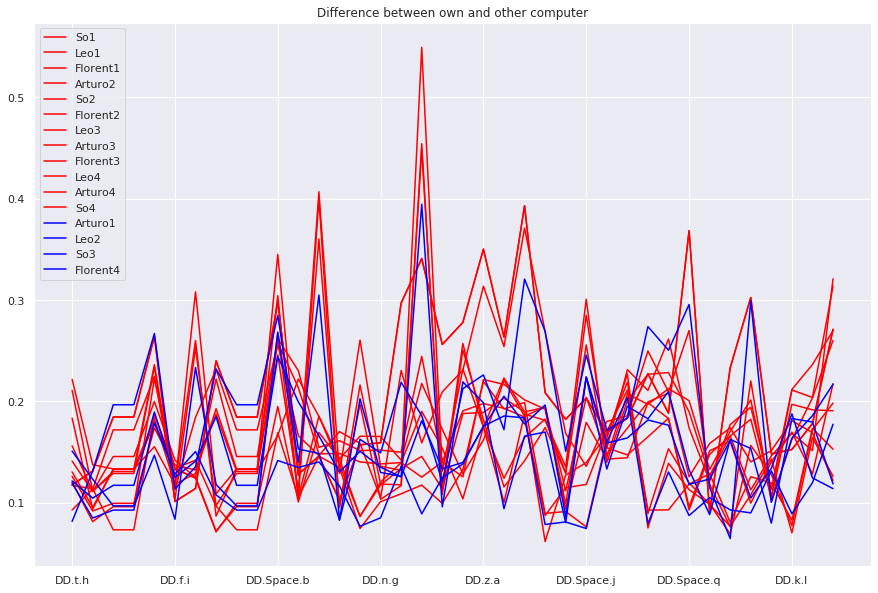

In [164]:
query1 = 'Session == 1'
query2 = 'Session == 2'

FirstQuery = MeanDDTPC.query(query2)[['DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']]
ax = FirstQuery.T.plot(label= 'Other', color='red')
SecondQuery = MeanDDTPC.query(query1)[['DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']]
SecondQuery.T.plot(color= 'blue', label = 'Own', figsize=(15,10), title = 'Difference between own and other computer', ax=ax)

#### There seems to be a little difference between using you own computer or not, but who is writing is still the most important parameter

###       

### Computer/language difference

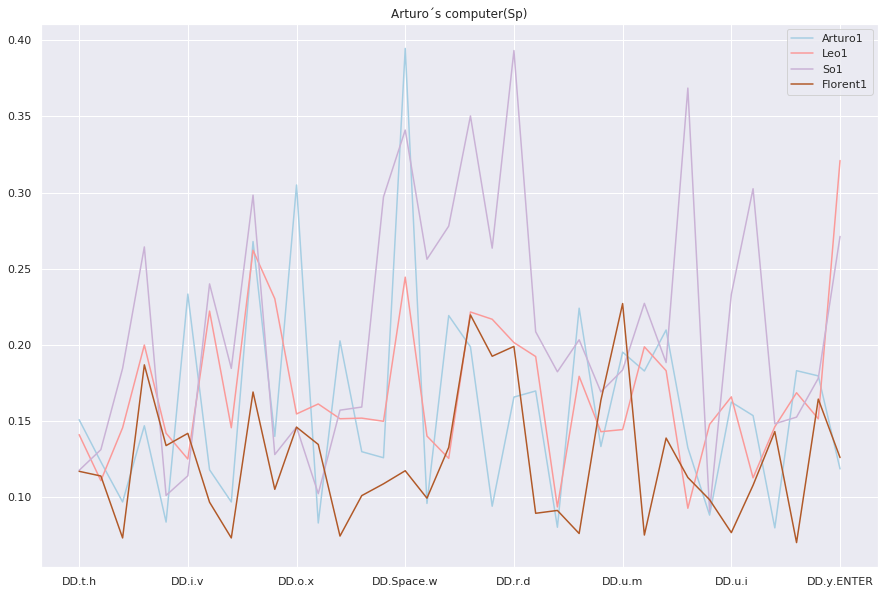

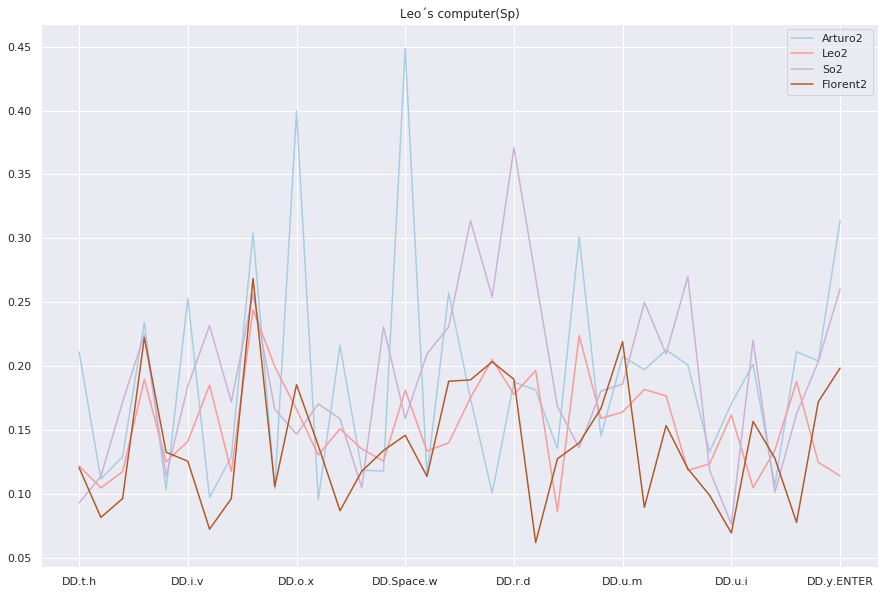

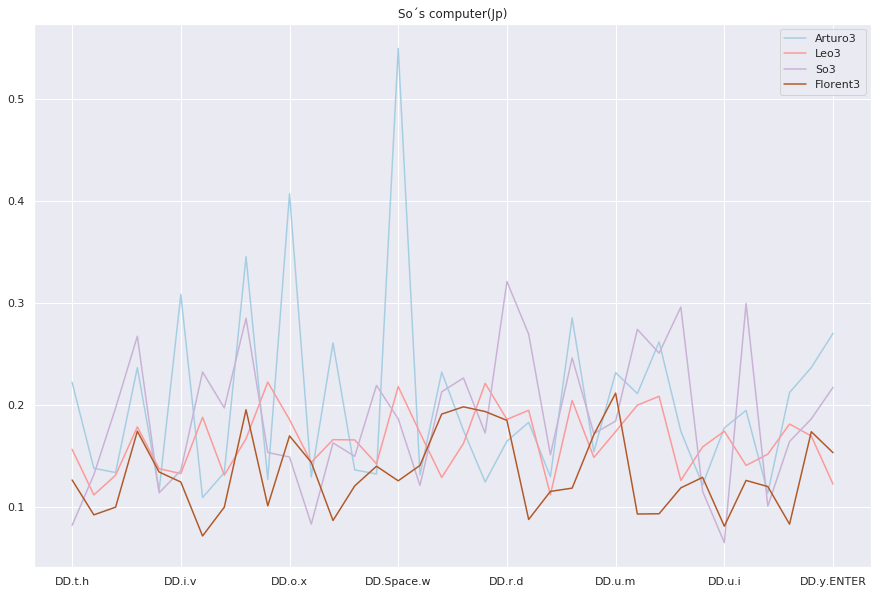

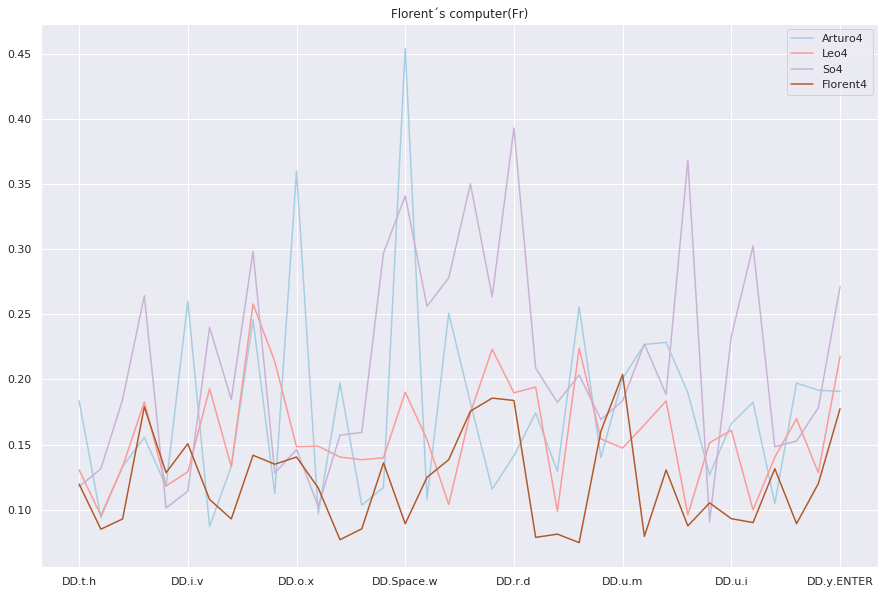

In [166]:
MeanDDPC[['Arturo1','Leo1','So1','Florent1']].iloc[1:37].plot(figsize=(15,10), colormap='Paired', title= 'Arturo´s computer(Sp)')
MeanDDPC[['Arturo2','Leo2','So2','Florent2']].iloc[1:37].plot(figsize=(15,10), colormap='Paired', title= 'Leo´s computer(Sp)')
MeanDDPC[['Arturo3','Leo3','So3','Florent3']].iloc[1:37].plot(figsize=(15,10), colormap='Paired', title= 'So´s computer(Jp)')
MeanDDPC[['Arturo4','Leo4','So4','Florent4']].iloc[1:37].plot(figsize=(15,10), colormap='Paired', title= 'Florent´s computer(Fr)')

#### The type of keyboard is not so important, the most important factor is the user. At least for Europeans/Americans, but for So (Japanese) the difference is noticeable

###        

### We split the data into 3 tables, the hold, Press-Press and Release-Press tables with the "try" column now

In [168]:
holdTry = dataPC[['Try','H.t','H.h','H.e','H.Space','H.f','H.i','H.v','H.e','H.Space','H.b','H.o','H.x','H.i','H.n','H.g','H.Space','H.w','H.i','H.z','H.a','H.r','H.d','H.s','H.Space','H.j','H.u','H.m','H.p','H.Space','H.q','H.u','H.i','H.c','H.k','H.l','H.y','H.ENTER']].copy()
UDTry = dataPC[['Try','UD.t.h','UD.h.e','UD.e.Space','UD.Space.f','UD.f.i','UD.i.v','UD.v.e','UD.e.Space','UD.Space.b','UD.b.o','UD.o.x','UD.x.i','UD.i.n','UD.n.g','UD.g.Space','UD.Space.w','UD.w.i','UD.i.z','UD.z.a','UD.a.r','UD.r.d','UD.d.s','UD.s.Space','UD.Space.j','UD.j.u','UD.u.m','UD.m.p','UD.p.Space','UD.Space.q','UD.q.u','UD.u.i','UD.i.c','UD.c.k','UD.k.l','UD.l.y','UD.y.ENTER']].copy()
DDTry = dataPC[['Try','DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']].copy()

### Do the users improve their Press-Press speed as the time goes on?

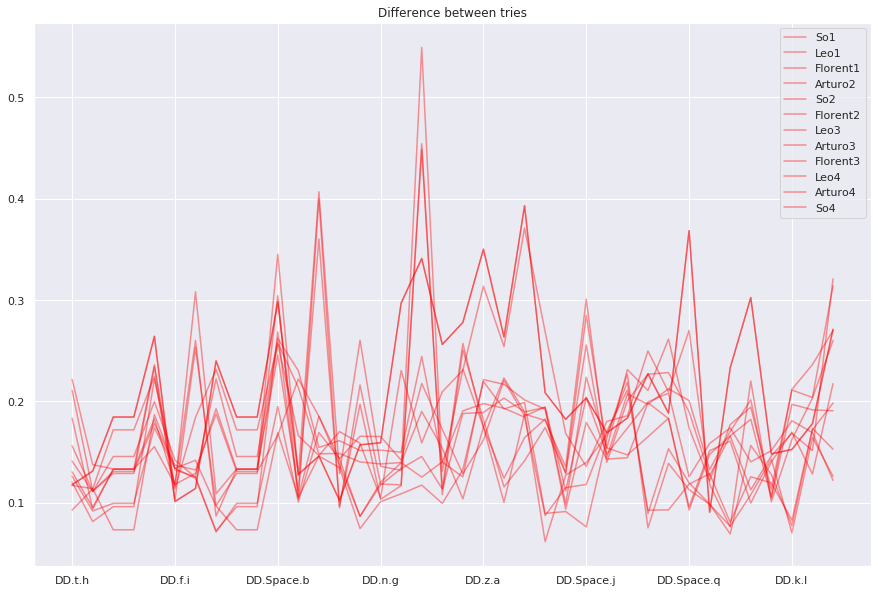

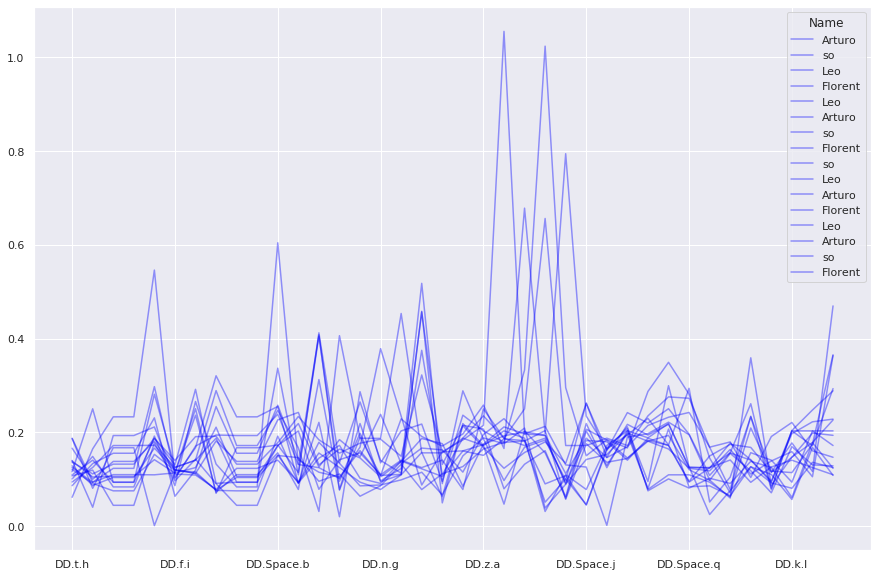

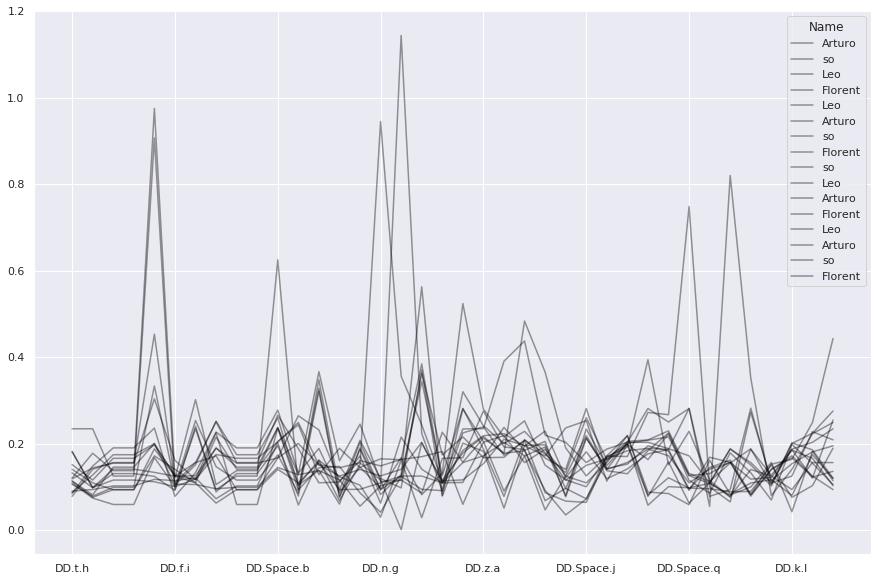

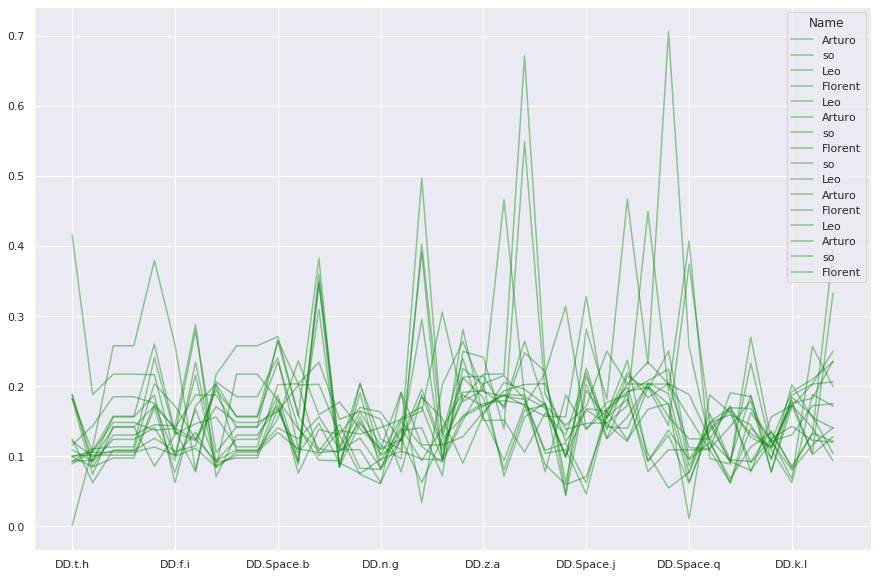

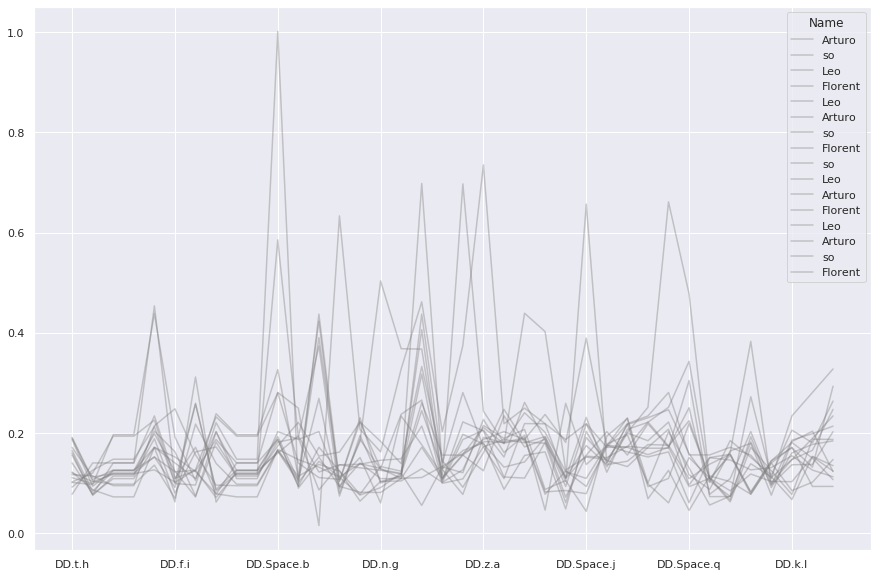

In [169]:
queryA = 'Try == 1'
queryB = 'Try == 5'
queryC = 'Try == 10'
queryD = 'Try == 15'
queryE = 'Try == 20'

AQuery = DDTry.query(queryA)[['DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']]
FirstQuery.T.plot(label= 'Other', color='red',figsize=(15,10), title = 'Difference between tries', alpha=0.4)
BQuery = DDTry.query(queryB)[['DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']]
BQuery.T.plot(color= 'blue', label = 'Own', figsize=(15,10), alpha=0.4)
CQuery = DDTry.query(queryC)[['DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']]
CQuery.T.plot(color= 'black', label = 'Own', figsize=(15,10), alpha=0.4)
DQuery = DDTry.query(queryD)[['DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']]
DQuery.T.plot(color= 'green', label = 'Own', figsize=(15,10), alpha=0.4)
EQuery = DDTry.query(queryE)[['DD.t.h','DD.h.e','DD.e.Space','DD.Space.f','DD.f.i','DD.i.v','DD.v.e','DD.e.Space','DD.Space.b','DD.b.o','DD.o.x','DD.x.i','DD.i.n','DD.n.g','DD.g.Space','DD.Space.w','DD.w.i','DD.i.z','DD.z.a','DD.a.r','DD.r.d','DD.d.s','DD.s.Space','DD.Space.j','DD.j.u','DD.u.m','DD.m.p','DD.p.Space','DD.Space.q','DD.q.u','DD.u.i','DD.i.c','DD.c.k','DD.k.l','DD.l.y','DD.y.ENTER']]
EQuery.T.plot(color= 'gray', label = 'Own', figsize=(15,10), alpha=0.4)

#### It's curious, the first try has the lowest peaks (the biggest is 0.5), but it's not good in average pace. People are more focused even if they know least the sentence. When the tries go on, the gain in speed between letters(average below 0.2) but lose it between words due to (most probably) lost of focus

###      

### And the hold time is affected?

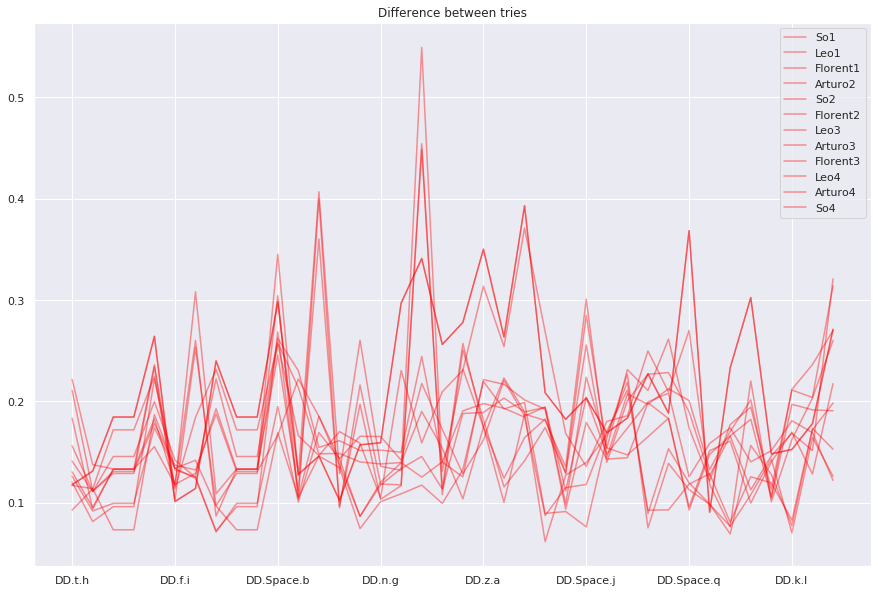

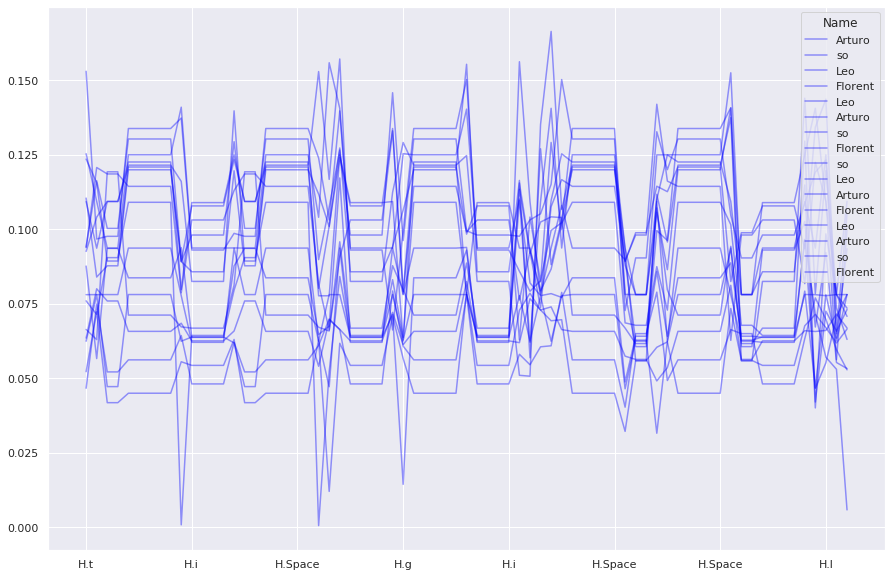

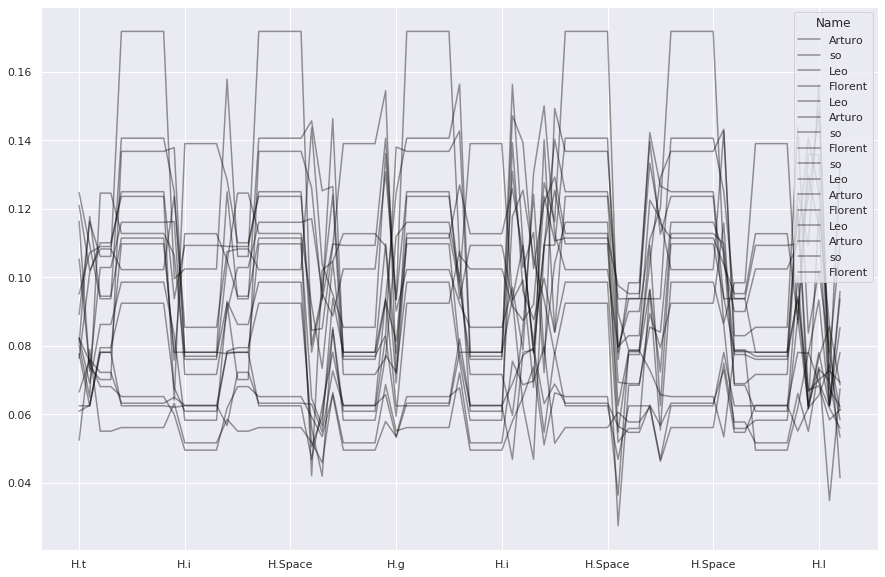

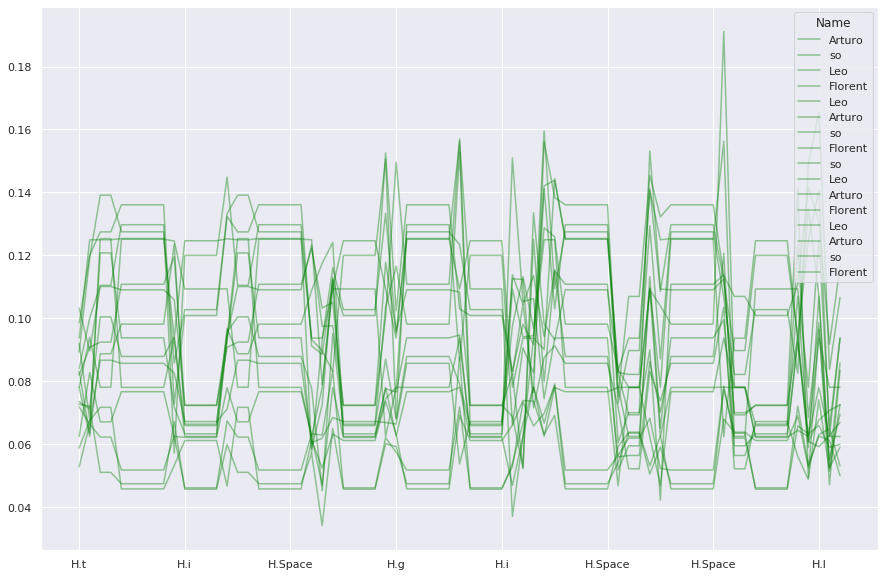

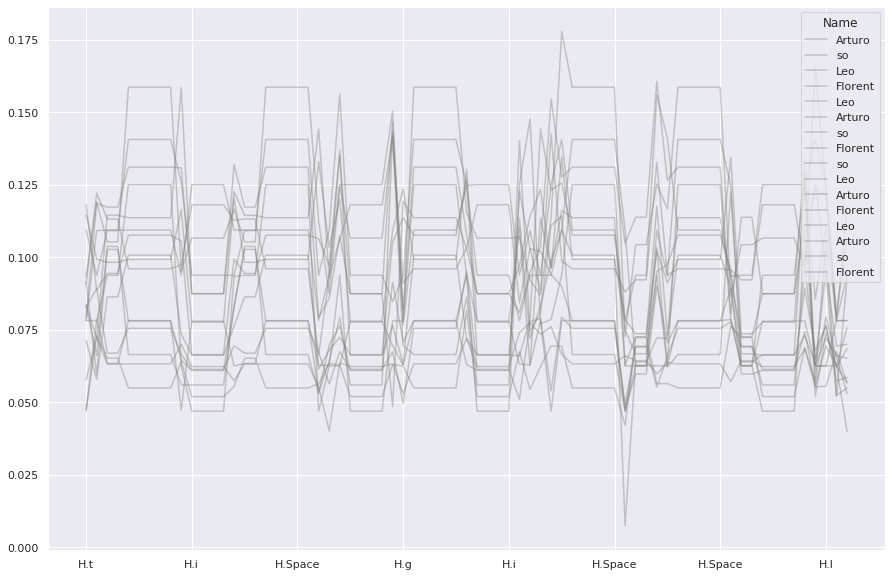

In [171]:
queryA = 'Try == 1'
queryB = 'Try == 5'
queryC = 'Try == 10'
queryD = 'Try == 15'
queryE = 'Try == 20'

AQuery = holdTry.query(queryA)[['H.t','H.h','H.e','H.Space','H.f','H.i','H.v','H.e','H.Space','H.b','H.o','H.x','H.i','H.n','H.g','H.Space','H.w','H.i','H.z','H.a','H.r','H.d','H.s','H.Space','H.j','H.u','H.m','H.p','H.Space','H.q','H.u','H.i','H.c','H.k','H.l','H.y','H.ENTER']]
FirstQuery.T.plot(label= 'Other', color='red',figsize=(15,10), title = 'Difference between tries', alpha=0.4)
BQuery = holdTry.query(queryB)[['H.t','H.h','H.e','H.Space','H.f','H.i','H.v','H.e','H.Space','H.b','H.o','H.x','H.i','H.n','H.g','H.Space','H.w','H.i','H.z','H.a','H.r','H.d','H.s','H.Space','H.j','H.u','H.m','H.p','H.Space','H.q','H.u','H.i','H.c','H.k','H.l','H.y','H.ENTER']]
BQuery.T.plot(color= 'blue', label = 'Own', figsize=(15,10), alpha=0.4)
CQuery = holdTry.query(queryC)[['H.t','H.h','H.e','H.Space','H.f','H.i','H.v','H.e','H.Space','H.b','H.o','H.x','H.i','H.n','H.g','H.Space','H.w','H.i','H.z','H.a','H.r','H.d','H.s','H.Space','H.j','H.u','H.m','H.p','H.Space','H.q','H.u','H.i','H.c','H.k','H.l','H.y','H.ENTER']]
CQuery.T.plot(color= 'black', label = 'Own', figsize=(15,10), alpha=0.4)
DQuery = holdTry.query(queryD)[['H.t','H.h','H.e','H.Space','H.f','H.i','H.v','H.e','H.Space','H.b','H.o','H.x','H.i','H.n','H.g','H.Space','H.w','H.i','H.z','H.a','H.r','H.d','H.s','H.Space','H.j','H.u','H.m','H.p','H.Space','H.q','H.u','H.i','H.c','H.k','H.l','H.y','H.ENTER']]
DQuery.T.plot(color= 'green', label = 'Own', figsize=(15,10), alpha=0.4)
EQuery = holdTry.query(queryE)[['H.t','H.h','H.e','H.Space','H.f','H.i','H.v','H.e','H.Space','H.b','H.o','H.x','H.i','H.n','H.g','H.Space','H.w','H.i','H.z','H.a','H.r','H.d','H.s','H.Space','H.j','H.u','H.m','H.p','H.Space','H.q','H.u','H.i','H.c','H.k','H.l','H.y','H.ENTER']]
EQuery.T.plot(color= 'gray', label = 'Own', figsize=(15,10), alpha=0.4)

#### The only difference is the first try, maybe do to the adjustment to the keyboard

###   

### From this data we take...